In [1]:
import pandas as pd
import libs.simple_processing as pds
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import re

# https://www.kaggle.com/alexisbcook/titanic-tutorial
# https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook

In [2]:
results = {}
# Read the data
X = pd.read_csv('input/train.csv')
X_test_full = pd.read_csv('input/test.csv')

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
def get_surname(name):
    reg = re.compile('([A-Za-z]+),')
    return reg.findall(name)[0]


def process_data(df):
    df['Surname'] = df.apply(lambda row: get_surname(row['Name']), axis='columns')
    df.drop(['Name', 'Cabin', 'Ticket'], axis='columns', inplace=True)
    df.dropna(axis='index', subset=df.columns, inplace=True)

    return df


X = process_data(X)
X_test_full = process_data(X_test_full)

X, y = pds.separate_target(X, 'Survived')

# Splitting into train and validation data
train_perc = 0.8
valid_perc = 0.2
X_train_full, X_valid_full, y_train, y_valid = pds.split_train_test(X, y, train_perc, valid_perc)

# converting categorical cols into numerical
X_train, X_valid, X_test = pds.categorical_numerical_cols(X_train_full, X_valid_full, X_test_full)

X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Surname_Widener,Surname_Wiklund,Surname_Wilhelms,Surname_Williams,Surname_Wright,Surname_Yarred,Surname_Yasbeck,Surname_Young,Surname_Youseff,Surname_hoef
0,892,3,34.5,0,0,7.8292,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,894,2,62.0,0,0,9.6875,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,896,3,22.0,1,1,12.2875,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
PassengerColumn = X_test.PassengerId
X_train.drop(['PassengerId'], axis='columns', inplace=True)
X_valid.drop(['PassengerId'], axis='columns', inplace=True)
X_test.drop(['PassengerId'], axis='columns', inplace=True)

max_train = 0
max_valid = 0
max_est = 0
max_lr = 0
max_md = 0

print(PassengerColumn)
# print(X_train)
# print(X_valid)

0       892
1       893
2       894
3       895
4       896
       ... 
409    1301
411    1303
412    1304
414    1306
415    1307
Name: PassengerId, Length: 331, dtype: int64


In [5]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# data_correlations = X_train.corr()
# plt.subplots(figsize=(55, 55))
# sns.heatmap(data_correlations, annot=True)

In [6]:

for i in range(300, 450, 50):
    for lr in np.arange(0.01, 0.03, 0.005):
        for md in range(5, 7, 1):
            model = GradientBoostingClassifier(n_estimators=i, random_state=0, learning_rate=lr, max_depth=md)
            model.fit(X_train, y_train)
            train_score = model.score(X_train, y_train)
            valid_score = model.score(X_valid, y_valid)
            if valid_score > max_valid:
                max_train = train_score
                max_valid = valid_score
                max_est = i
                max_lr = lr
                max_md = md

            if valid_score > 0.82:
                print('train_perc: {:.2f}' .format(train_perc) + ' valid_perc: {:.2f}' .format(valid_perc) + ' est: {:.0f}'.format(i) + ' lr: {:.3f}'.format(lr) + ' md: {:.0f}'.format(md)
                      + ' => train data: {:.3f}'.format(train_score)
                      + ' val data: {:.3f}'.format(valid_score))


print('BEST: train_perc: {:.2f}' .format(train_perc) + ' valid_perc: {:.2f}' .format(valid_perc) + ' est: {:.0f}'.format(max_est) + ' lr: {:.3f}'.format(max_lr) + ' md: {:.0f}'.format(max_md)
      + ' => train data: {:.3f}'.format(max_train)
      + ' val data: {:.3f}'.format(max_valid))


train_perc: 0.80 valid_perc: 0.20 est: 300 lr: 0.010 md: 5 => train data: 0.914 val data: 0.839
train_perc: 0.80 valid_perc: 0.20 est: 300 lr: 0.010 md: 6 => train data: 0.919 val data: 0.846
train_perc: 0.80 valid_perc: 0.20 est: 300 lr: 0.015 md: 5 => train data: 0.912 val data: 0.832
train_perc: 0.80 valid_perc: 0.20 est: 300 lr: 0.015 md: 6 => train data: 0.984 val data: 0.846
train_perc: 0.80 valid_perc: 0.20 est: 300 lr: 0.020 md: 5 => train data: 0.982 val data: 0.825
train_perc: 0.80 valid_perc: 0.20 est: 300 lr: 0.020 md: 6 => train data: 0.986 val data: 0.839
train_perc: 0.80 valid_perc: 0.20 est: 300 lr: 0.025 md: 5 => train data: 0.982 val data: 0.825
train_perc: 0.80 valid_perc: 0.20 est: 300 lr: 0.025 md: 6 => train data: 0.991 val data: 0.839
train_perc: 0.80 valid_perc: 0.20 est: 350 lr: 0.010 md: 5 => train data: 0.914 val data: 0.839
train_perc: 0.80 valid_perc: 0.20 est: 350 lr: 0.010 md: 6 => train data: 0.935 val data: 0.839
train_perc: 0.80 valid_perc: 0.20 est: 3

In [7]:
# Accuracy score:  0.8391608391608392
# model = GradientBoostingClassifier(n_estimators=350, random_state=0, learning_rate=0.02, max_depth=6)
# Accuracy score:  0.8461538461538461
from libs.simple_processing import print_scores

winner = GradientBoostingClassifier(n_estimators=300, random_state=0, learning_rate=0.010, max_depth=6, max_features="auto")
# bez nazwisk
# winner = GradientBoostingClassifier(n_estimators=400, random_state=0, learning_rate=0.025, max_depth=5, max_features="auto")
winner.fit(X_train, y_train)

y_pred = winner.predict(X_valid)
pd.DataFrame({'y_valid' : y_valid, 'y_pred': y_pred})

print_scores(y_valid, y_pred)

Accuracy score:  0.8461538461538461
Accuracy count:  121 / 143
Precision score:  0.9148936170212766
Recall score:  0.7049180327868853
F1 score:  0.7962962962962963


## ROC

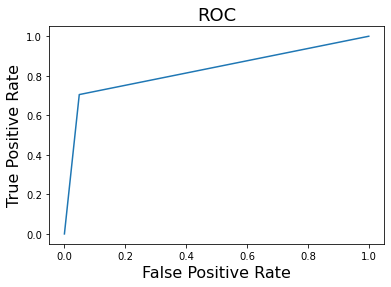

In [8]:
import libs.simpleplotter as plot

plot.simple_roc(y_valid, y_pred)

In [ ]:
from libs.simpleplotter import receiver_operating_characteristics

receiver_operating_characteristics(X_train, y_train)

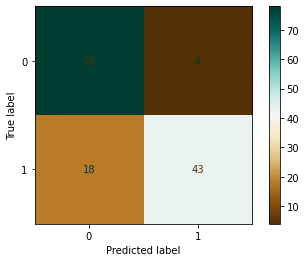

array([[78,  4],
       [18, 43]])

In [9]:
from libs.simpleplotter import simple_confusion_matrix

simple_confusion_matrix(y_valid, y_pred, winner.classes_)

In [10]:
y_test = winner.predict(X_test)
output = pd.DataFrame({'PassengerId': PassengerColumn, 'Survived': y_test})
output.to_csv('./submission.csv', index=False)
SUBMISSION = pd.read_csv("./submission.csv")
SUBMISSION

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
326,1301,1
327,1303,1
328,1304,0
329,1306,1


Let's see which features were the most important for the training

In [11]:
labels = X_train.keys()
labels_filtered = []
importance_filtered = []
importance_threshold = 0.005

for index in range(len(winner.feature_importances_)):
    if winner.feature_importances_[index] > importance_threshold:
        labels_filtered.append(labels[index])
        importance_filtered.append(winner.feature_importances_[index])


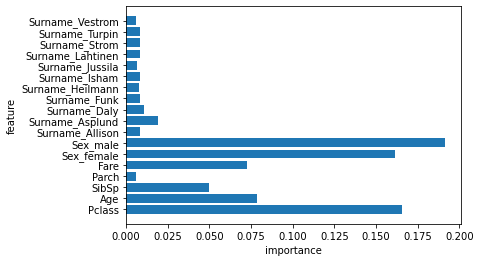

In [12]:
import matplotlib.pyplot as plt

plt.barh(y=range(len(labels_filtered)), width=importance_filtered, align='center')
plt.yticks(np.arange(len(labels_filtered)), labels_filtered)
plt.xlabel("importance")
plt.ylabel(ylabel="feature")
plt.show()